<a href="https://colab.research.google.com/github/Claudio577/colab-project/blob/main/Primeiro_projeto_de_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
sns.set_style("darkgrid") # Estilo do gráfico


# **Importação de Dados**

In [19]:
# Ler os dados
import pandas as pd

movie = pd.read_csv('movie.csv')
rating = pd.read_csv('rating.csv')

movie.shape, rating.shape

((27278, 3), (65345, 4))

In [20]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [21]:
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


# **Modelagem de dados**

In [22]:
# Cruzamento das tabelas

Tab_Cruzada = movie.merge(rating, how = 'inner', on = 'movieId')
Tab_Cruzada.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,2009-01-02 01:13:41


# **Data Vizualization-Exploração**

In [23]:
# Analise descritiva
Tab_Cruzada.describe()

,movieId,userId,rating
count,65345.000000,65345.000000,65345.000000
mean,8302.833499,246.179065,3.488790
std,18631.322621,132.407559,1.079531
min,1.000000,1.000000,0.500000
25%,828.000000,132.000000,3.000000
50%,2111.000000,254.000000,3.500000
75%,4361.000000,367.000000,4.000000
max,128488.000000,459.000000,5.000000


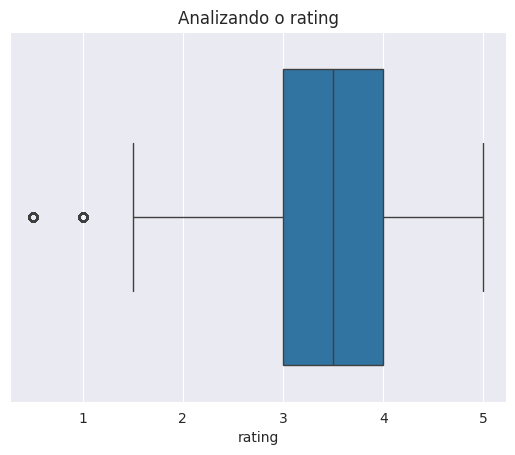

In [24]:
plt.title('Analizando o rating')
sns.boxplot(data=Tab_Cruzada,x='rating');

In [25]:
Analise = Tab_Cruzada.groupby( by=['title'] ).agg(
    Quantidade = ('title','count'),
    Media = ('rating','mean'),
    Max = ('rating','max'),
    Min = ('rating','min'),
    Mediana = ('rating','median'),
)
# Verificado
Analise.head()

,Quantidade,Media,Max,Min,Mediana
title,,,,,
'Round Midnight (1986),1,4.000000,4.0,4.0,4.0
'Til There Was You (1997),3,2.333333,3.0,2.0,2.0
"'burbs, The (1989)",9,3.166667,5.0,1.0,3.0
'night Mother (1986),3,4.666667,5.0,4.0,5.0
(500) Days of Summer (2009),14,4.035714,5.0,3.0,4.0


In [11]:
# Verificar
Analise.sort_values(['Media', 'Quantidade' ], ascending=False ).head()

,Quantidade,Media,Max,Min,Mediana
title,,,,,
Catastroika (2012),2,5.0,5.0,5.0,5.0
Consuming Kids: The Commercialization of Childhood (2008),2,5.0,5.0,5.0,5.0
1971 (2014),1,5.0,5.0,5.0,5.0
A Blank on the Map (1971),1,5.0,5.0,5.0,5.0
A Gun for Jennifer (1997),1,5.0,5.0,5.0,5.0


In [14]:
px.scatter(
    #dados
    data_frame = Analise,
    #Parametros
    x = 'Quantidade', y= 'Media',
    #Titulo
    title = 'Media X Quantidade - Titulo',
    #Upgrade
    marginal_y='rug', marginal_x='histogram'
)

In [15]:
# Correlação
Analise.corr()

,Quantidade,Media,Max,Min,Mediana
Quantidade,1.000000,0.143184,0.170421,-0.191828,0.141501
Media,0.143184,1.000000,0.586712,0.283355,0.958332
Max,0.170421,0.586712,1.000000,-0.407807,0.570868
Min,-0.191828,0.283355,-0.407807,1.000000,0.192333
Mediana,0.141501,0.958332,0.570868,0.192333,1.000000


In [37]:
# Analise
Analise ['Quantidade'].describe()

,Quantidade
count,7238.000000
mean,9.028046
std,17.725999
min,1.000000
25%,1.000000
50%,3.000000
75%,8.000000
max,232.000000


In [44]:
def Classificao_Quantidade(Quantidade):
    '''
    Agrupar a quantidade
    '''
    quantidade = int(Quantidade)

    if quantidade <= 10:
        return '1-10k Avaliações'
    elif quantidade <= 20:
        return '10K-20K Avaliações'
    elif quantidade <= 40:
        return '20K-40K Avaliações'
    elif quantidade <= 100:
        return '40K-100K Avaliações'
    else:
        return '>100K Avaliações'
# Aplicação
Pizza = Analise['Quantidade'].apply(Classificao_Quantidade).value_counts(normalize=True)

# Transformar em DataFrame
Pizza = pd.DataFrame(Pizza).reset_index()
Pizza.columns = ['Faixa', 'Proporcao']
# Plot
fig = px.pie(
    data_frame=Pizza,
    names='Faixa',
  values='Proporcao',
    title='Divisão das Quantidades'
)

fig.show()


In [45]:
Pizza

,Faixa,Proporcao
0,1-10k Avaliações,0.790550
1,10K-20K Avaliações,0.098646
2,20K-40K Avaliações,0.062310
3,40K-100K Avaliações,0.040757
4,>100K Avaliações,0.007737


In [86]:
# Gerar Matriz

Matriz = Tab_Cruzada.pivot_table(values='userId',index='title',columns='movieId')

# Retirar os NaN
Matriz.fillna(0,inplace=True)
# Verificar
Matriz.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,116799,116841,117176,117511,117590,118354,118696,119141,125916,128488
title,,,,,,,,,,,,,,,,,,,,,
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"'burbs, The (1989)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'night Mother (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
#Transformação para vetores

from scipy.sparse import csr_matrix

Matriz_sparse = csr_matrix(Matriz)
Matriz_sparse

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7239 stored elements and shape (7238, 7239)>

In [90]:
# Criar o modelo
from sklearn.neighbors import NearestNeighbors

# Parametro
Modelo = NearestNeighbors(
    #Quantidade de recomencações
    n_neighbors = 5,
# Tipo de algoritimo
    algorithm= 'brute',
# Metrica de distancia
    metric= 'minkowski'
)
# Fitar o Modelo
Modelo.fit(Matriz_sparse)

NearestNeighbors(algorithm='brute')

In [91]:
# Recomenadações

# Escolha livro

# Descobrir Midnight
for Posicao,title in enumerate (Matriz.index):
  # Midnight
  if 'Midnight' in title:
    print (Posicao,title)

0 'Round Midnight (1986)
452 At Midnight I'll Take Your Soul (À Meia-Noite Levarei Sua Alma) (1964)
668 Before Midnight (2013)
3205 In Search of a Midnight Kiss (2007)
4213 Midnight Clear, A (1992)
4214 Midnight Cowboy (1969)
4215 Midnight Express (1978)
4216 Midnight Madness (1980)
4217 Midnight Meat Train, The (2008)
4218 Midnight Run (1988)
4219 Midnight in Paris (2011)
4220 Midnight in the Garden of Good and Evil (1997)
4948 Permanent Midnight (1998)


In [93]:
# Selecionar o Livro #### CLIENTE COMPROU (DEPOIS DE UMA SUPOSTA PESQUISA TAMBEM) ESSE LIVRO !!!! ######
# SISTEMA DE FILTRAGEM COLABORATIVA / APRENDIZADO NAO SUPERIVISIONADO
Selecionar_Livro = Matriz.iloc[668,:].values.reshape(1,-1)

# Previsão do Modelo
Distancia,Recomendacao =Modelo.kneighbors(Selecionar_Livro)
# AVALIAÇAO / RENTABILIDADE / SERIES / NOTICIAS
#### RECOMENDAÇOES ####
# Ver as sugestões
for Loop in range (len(Recomendacao)):

  print(Matriz.index[Recomendacao[Loop]])

Index(['Before Midnight (2013)', 'Wilder Napalm (1993)',
       'Picture of Dorian Gray, The (1945)', 'War Zone, The (1999)',
       'Halloween 5: The Revenge of Michael Myers (1989)'],
      dtype='object', name='title')
